# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [86]:
# my usual imports and setups
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import io
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as plt
from pandas import Series, DataFrame
import json
from pandas.io.json import json_normalize
import sys
import scipy as sp
import scipy.stats
from IPython.display import Image



if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2018")
    

%pylab inline






Must set env variable PUI2018
Populating the interactive namespace from numpy and matplotlib


In [87]:
# imports downloader
# from getCitiBikeCSV import getCitiBikeCSV

In [88]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [89]:
datestring1 = '201501'
getCitiBikeCSV(datestring1)
datestring2 = '201507'
getCitiBikeCSV(datestring2)

file in place, you can continue
file in place, you can continue


In [90]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [91]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1


In [92]:
# df is the dataframe where the content of the csv file is stored
df1['date'] = pd.to_datetime(df1['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [93]:
df2['date'] = pd.to_datetime(df2['starttime'])
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1,2015-07-01 00:00:03
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1,2015-07-01 00:00:06
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1,2015-07-01 00:00:17
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1,2015-07-01 00:00:23
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1,2015-07-01 00:00:44


In [94]:
df1.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [95]:
df2.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [96]:
#dropping some data I no longer need
#... your code here...
df1.drop(['stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year','gender'], axis=1, inplace=True)
df1.head()

,tripduration,starttime,date
0,1346,1/1/2015 0:01,2015-01-01 00:01:00
1,363,1/1/2015 0:02,2015-01-01 00:02:00
2,346,1/1/2015 0:04,2015-01-01 00:04:00
3,182,1/1/2015 0:04,2015-01-01 00:04:00
4,969,1/1/2015 0:05,2015-01-01 00:05:00


In [97]:
#df is the dataframe where the content of the csv file is stored
df1['DayTrip'] = df1['tripduration'][(df1['date'].dt.hour > 6 ) & (df1['date'].dt.hour <= 18)]
df1['NightTrip'] = df1['tripduration'][(df1['date'].dt.hour <= 6 ) | (df1['date'].dt.hour > 18)]
df1.head()

,tripduration,starttime,date,DayTrip,NightTrip
0,1346,1/1/2015 0:01,2015-01-01 00:01:00,NaN,1346.0
1,363,1/1/2015 0:02,2015-01-01 00:02:00,NaN,363.0
2,346,1/1/2015 0:04,2015-01-01 00:04:00,NaN,346.0
3,182,1/1/2015 0:04,2015-01-01 00:04:00,NaN,182.0
4,969,1/1/2015 0:05,2015-01-01 00:05:00,NaN,969.0


In [98]:
# dropping NaN values
df1['DayTrip'].dropna(inplace= True)
df1['NightTrip'].dropna(inplace= True)

In [99]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df1.describe()

,tripduration,DayTrip,NightTrip
count,285552.000000,222548.000000,63004.000000
mean,654.325583,665.166903,616.030966
std,900.775928,835.508842,1099.917889
min,60.000000,60.000000,60.000000
25%,334.000000,NaN,NaN
50%,504.000000,NaN,NaN
75%,772.000000,NaN,NaN
max,43023.000000,43023.000000,42878.000000


In [100]:
df2.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [101]:
df2.drop(['stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year','gender'], axis=1, inplace=True)
df2.head()

,tripduration,starttime,date
0,732,7/1/2015 00:00:03,2015-07-01 00:00:03
1,322,7/1/2015 00:00:06,2015-07-01 00:00:06
2,790,7/1/2015 00:00:17,2015-07-01 00:00:17
3,1228,7/1/2015 00:00:23,2015-07-01 00:00:23
4,1383,7/1/2015 00:00:44,2015-07-01 00:00:44


In [102]:
df2['DayTrip'] = df2['tripduration'][(df2['date'].dt.hour > 6 ) & (df2['date'].dt.hour <= 18)]
df2['NightTrip'] = df2['tripduration'][(df2['date'].dt.hour > 18) | (df2['date'].dt.hour < 6)]
df2.head()

,tripduration,starttime,date,DayTrip,NightTrip
0,732,7/1/2015 00:00:03,2015-07-01 00:00:03,NaN,732.0
1,322,7/1/2015 00:00:06,2015-07-01 00:00:06,NaN,322.0
2,790,7/1/2015 00:00:17,2015-07-01 00:00:17,NaN,790.0
3,1228,7/1/2015 00:00:23,2015-07-01 00:00:23,NaN,1228.0
4,1383,7/1/2015 00:00:44,2015-07-01 00:00:44,NaN,1383.0


In [103]:
df2['DayTrip'].dropna(inplace= True)
df2['NightTrip'].dropna(inplace= True)

In [104]:
df2.describe()

,tripduration,DayTrip,NightTrip
count,1.085676e+06,8.064740e+05,2.551220e+05
mean,9.676701e+02,9.575090e+02,1.024993e+03
std,8.037309e+03,6.740469e+03,1.142655e+04
min,6.000000e+01,6.000000e+01,6.000000e+01
25%,4.120000e+02,NaN,NaN
50%,6.660000e+02,NaN,NaN
75%,1.104000e+03,NaN,NaN
max,5.174309e+06,5.174309e+06,3.611666e+06


lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

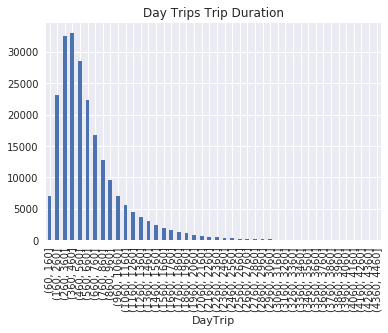

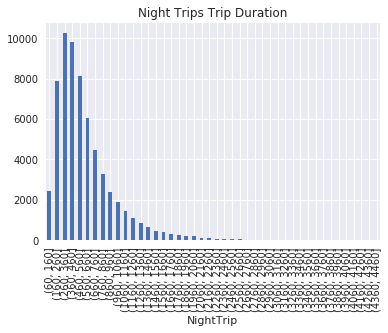

In [179]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!

# there are particular outliers up to as large as 45,000. For the sake and buauty of bar graph I decide to pick the 
# range between (60, 4500) instead of (60,45000), which also creates a better-looking normalized distribution graph.

bins = np.arange(60, 4500, 100)
axD = df1.DayTrip.groupby(pd.cut(df1.DayTrip, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("Day Trips Trip Duration")
axN = df1.NightTrip.groupby(pd.cut(df1.NightTrip, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("Night Trips Trip Duration");


**Figure 1: histogrammed distribution of riders' trip duration by day trips and night trips for 2015.1 data **
Graph for day trips is on top while the graphy for the night trips is on the bottom. 

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

              count_nonzero
DayTrip                    
(60, 160]          0.007166
(160, 260]         0.028419
(260, 360]         0.044918
(360, 460]         0.052426
(460, 560]         0.052653
(560, 660]         0.048659
(660, 760]         0.044543
(760, 860]         0.039170
(860, 960]         0.033587
(960, 1060]        0.031897
(1060, 1160]       0.029306
(1160, 1260]       0.026255
(1260, 1360]       0.023305
(1360, 1460]       0.020187
(1460, 1560]       0.016563
(1560, 1660]       0.013968
(1660, 1760]       0.011290
(1760, 1860]       0.009740
(1860, 1960]       0.008312
(1960, 2060]       0.007488
(2060, 2160]       0.006400
(2160, 2260]       0.005513
(2260, 2360]       0.004745
(2360, 2460]       0.003783
(2460, 2560]       0.002818
(2560, 2660]       0.002302
(2660, 2760]       0.001941
(2760, 2860]       0.001742
(2860, 2960]       0.001582
(2960, 3060]       0.001297
(3060, 3160]       0.001224
(3160, 3260]       0.001000
(3260, 3360]       0.000793
(3360, 3460]       0

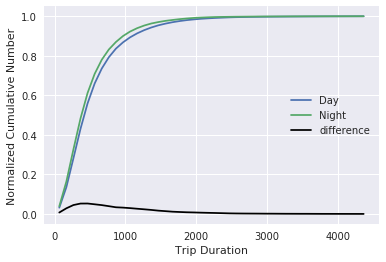

In [180]:
#print df.ageS, df.ageS.cumsum()

csD=df1.DayTrip.groupby(pd.cut(df1.DayTrip, bins)).agg([count_nonzero]).cumsum()

csN=df1.NightTrip.groupby(pd.cut(df1.NightTrip, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of riders' trip duration by day trips and night trips for 2015.1 data** 
We see both figures for day and night trip duration really closely follow each other.

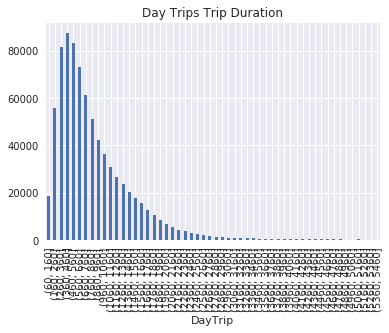

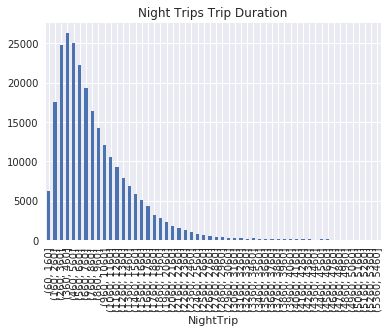

In [177]:
# there are particular outliers up to as large as 55,000. For the sake and buauty of bar graph I decide to pick the 
# range between (60, 5500) instead of (60,55000)

bins = np.arange(60, 5500, 100)
axD = df2.DayTrip.groupby(pd.cut(df2.DayTrip, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("Day Trips Trip Duration")
axN = df2.NightTrip.groupby(pd.cut(df2.NightTrip, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("Night Trips Trip Duration");


**Figure 3: histogrammed distribution of riders' trip duration by day trips and night trips for 2015.7 data **
Graph for day trips is on top while the graphy for the night trips is on the bottom. 

              count_nonzero
DayTrip                    
(60, 160]          0.001443
(160, 260]         0.001054
(260, 360]         0.003160
(360, 460]         0.008785
(460, 560]         0.014124
(560, 660]         0.017546
(660, 760]         0.017528
(760, 860]         0.016781
(860, 960]         0.013494
(960, 1060]        0.011054
(1060, 1160]       0.007789
(1160, 1260]       0.004442
(1260, 1360]       0.002588
(1360, 1460]       0.001232
(1460, 1560]       0.000555
(1560, 1660]       0.000108
(1660, 1760]       0.000948
(1760, 1860]       0.000727
(1860, 1960]       0.001175
(1960, 2060]       0.001639
(2060, 2160]       0.002133
(2160, 2260]       0.002498
(2260, 2360]       0.002746
(2360, 2460]       0.002955
(2460, 2560]       0.003259
(2560, 2660]       0.003317
(2660, 2760]       0.003344
(2760, 2860]       0.003323
(2860, 2960]       0.003122
(2960, 3060]       0.002945
(3060, 3160]       0.002945
(3160, 3260]       0.002731
(3260, 3360]       0.002451
(3360, 3460]       0

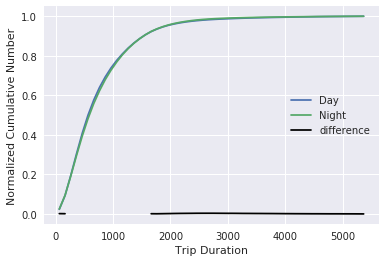

In [178]:
csD=df2.DayTrip.groupby(pd.cut(df2.DayTrip, bins)).agg([count_nonzero]).cumsum()

csN=df2.NightTrip.groupby(pd.cut(df2.NightTrip, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 4: the cumulative distribution of riders' trip duration by day trips and night trips for 2015.7 data** 
We see both figures for day and night trip duration really closely follow each other.

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [117]:
ks1 = scipy.stats.ks_2samp(df1.DayTrip, df1.NightTrip)
ks2 = scipy.stats.ks_2samp(df2.DayTrip, df2.NightTrip)
print (df1.shape)
print (df2.shape)
print (ks1)
print (ks2)
#print (ks)

(285552, 5)
(1085676, 5)
Ks_2sampResult(statistic=0.05546362452124871, pvalue=9.0619554774272109e-132)
Ks_2sampResult(statistic=0.016574723159734524, pvalue=1.0678626856384593e-46)


**  FILL IN THE CELL BELOW!**

## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function

Null Hypothesis: two arrays of sample observations assumed to be drawn from a continuous distribution

The KS test has returned statistics and p-values.
For a different distribution (28552 vs 1085676), we can reject the null hypothesis since the pvalue are both below 1%


According to reference link given above, along with my results computated, 

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

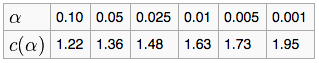

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

In [150]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
# Ref: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

df1_200TimesSmaller1 = df1.sample(n=None, frac= 1/200, replace=False, weights=None, random_state=None, axis=None)
print (df1_200TimesSmaller1.shape)
df1_200TimesSmaller2 = df1.sample(n=None, frac= 1/200, replace=False, weights=None, random_state=None, axis=None)
print (df1_200TimesSmaller2.shape)


(1428, 5)
(1428, 5)


In [151]:
df2_200TimesSmaller1 = df2.sample(n=None, frac= 1/200, replace=False, weights=None, random_state=None, axis=None)
print (df2_200TimesSmaller1.shape)
df2_200TimesSmaller2 = df2.sample(n=None, frac= 1/200, replace=False, weights=None, random_state=None, axis=None)
print (df2_200TimesSmaller2.shape)


(5428, 5)
(5428, 5)


In [152]:
df1_200TimesSmaller1['DayTrip'].dropna(inplace= True)
df1_200TimesSmaller2['NightTrip'].dropna(inplace= True)
df2_200TimesSmaller1['DayTrip'].dropna(inplace= True)
df2_200TimesSmaller2['NightTrip'].dropna(inplace= True)

In [153]:
ks3 = scipy.stats.ks_2samp(df1_200TimesSmaller1.DayTrip, df1_200TimesSmaller2.NightTrip)
ks4 = scipy.stats.ks_2samp(df2_200TimesSmaller1.DayTrip, df2_200TimesSmaller2.NightTrip)
print (ks3)
print (ks4)

Ks_2sampResult(statistic=0.05815569972196513, pvalue=0.34423044155162058)
Ks_2sampResult(statistic=0.056681397231879684, pvalue=0.0040146408274605852)


The KS test has returned statistics and p-values. For a different distribution (28552 vs 1085676), we can reject the null hypothesis since the pvalue are both below 1%

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



# Ho:
The relationship between both the DayTrip and NightTrip dataset do not follow a linear trend.
Alpha level = 0.05

In [166]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis
df163004 = np.random.choice(df1.DayTrip, 63004)

Pearson1 = scipy.stats.pearsonr((df163004), (df1.NightTrip))
print (Pearson1)

(-0.00023740879340148312, 0.95248230699014258)


The shown is unable to reject null hypothesis, since the p-value of 0.95248 definitely exceeds the significance threshold. 

In [174]:
df263004D = np.random.choice(df2.DayTrip, 63004)
df263004N = np.random.choice(df2.NightTrip, 63004)
Pearson2 = scipy.stats.pearsonr((df263004D), (df263004N))
print (Pearson2)

(-0.0013774522078692896, 0.72953658694788759)


The shown is unable to reject null hypothesis, since the p-value of 0.9275 definitely exceeds the significance threshold for the July data as well.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [175]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

Spearman1 = scipy.stats.spearmanr(df163004, df1.NightTrip, axis=0, nan_policy='omit')
print(Spearman1)
Spearman2 = scipy.stats.spearmanr(df263004D, df263004N, axis=0, nan_policy='omit')
print(Spearman2)

SpearmanrResult(correlation=0.006918979418581819, pvalue=0.082441637018247541)
SpearmanrResult(correlation=-0.0058135069725347805, pvalue=0.1445077658606802)


** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

Similar to Pearson's test, a similar null hypothesis can be applied to Spearman's test as well. 

H0: The relationship between both the DayTrip and NightTrip dataset do not follow a linear trend. Alpha level = 0.05

A p value of 0.082 and 0.144 would both unable to reject the null hypothesis.